# Import Python Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway # ANOVA Analysis
from scipy.stats import ttest_ind # Conducting a t-test
from scipy.stats import chi2_contingency # Statistical model for performing a chi-square analysis

In [2]:
df = pd.read_csv(r"C:\Users\shrom\Downloads\loan_approval_dataset.csv")

In [3]:
df.head(5)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


# Checking the shape of dataframe

In [4]:
df.shape

(4269, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


# Dataframe description

In [6]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


# Data Cleaning

# Removing white spaces in column name and all values

In [7]:
df.columns = df.columns.str.strip()

In [8]:
df = df.applymap(lambda x : x.strip() if isinstance(x, str) else x)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


# Checking for duplicates

In [10]:
df.duplicated(keep=False).sum()

0

# Convert values in a column to absolute value

In [11]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [12]:
df['residential_assets_value'] = df['residential_assets_value'].abs()

In [13]:
# count if there are negative values left
(df['residential_assets_value'] < 0).sum()

0

# Adding columns

In [14]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [15]:
# CIBIL RATING
# Cibil score are often used synonymously with 'credit score'
# A credit score is based on a credit report
# Used to represent the creditworthiness of an indivisual.
# The CIBIL Score ranges between 300 and 900
# Lenders such as banks and credit card companies use credit scores to evaluate the potential risk posed by lending money to consumers
# CIBIL score range    CIBIL Rating
# 300- 549             Poor
# 550- 649             Average
# 650- 749             Good
# 750- 900             Excellent

In [16]:
df['cibil_score'].min()

300

In [17]:
df['cibil_score'].max()

900

# Adding the CIBIL rating column

In [18]:
# Adding CIBIL Rating column with values (Poor, Average, Good, Excellent)
def cibil_rating(value):
    if 300 <= value <= 549:
        return 'Poor'
    elif 550 <= value <= 649:
        return 'Average'
    elif 650 <= value <= 749:
        return 'Good'
    elif 750 <= value <= 900:
        return 'Excellent'
    else: 
        return 'Error'


In [19]:
df['cibil_rating'] = df['cibil_score'].apply(cibil_rating)

In [20]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,cibil_rating
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor


In [21]:
# check if any error in cibil_rating column
df['cibil_rating'].unique()

array(['Excellent', 'Poor', 'Good', 'Average'], dtype=object)

# Addition of the income levels column

In [22]:
# Income levels
# Group income by applicants to different levels
# Income Range          Income Level
# 100,000- 1,000,000    Low
# 1,000,001- 4,000,000  Lower-middle
# 4,000,001- 7,500,000  Upper-middle
# 7,500,001- 10,000,000 High

In [23]:
df['income_annum'].min()

200000

In [24]:
df['income_annum'].max()

9900000

In [25]:
def income_levels(value):
    if 100000 <= value <= 1000000:
        return 'Low'
    elif 1000001 <= value <= 4000000:
        return 'Lower-Middle'
    elif 4000001 <= value <= 7500000:
        return 'Upper-Middle'
    elif 7500001 <= value <= 10000000:
        return 'High'
    else:
        return 'Very High Income'
    

In [26]:
df['income_level'] = df['income_annum'].apply(income_levels)

In [27]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,cibil_rating,income_level
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Upper-Middle
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High


In [28]:
df['income_level'].unique()

array(['High', 'Upper-Middle', 'Low', 'Lower-Middle'], dtype=object)

# Adding the loan rating column

In [29]:
# Loan amount rating
# Group loan amounts into
# Loan Range               Loan Rating
# 100,000- 10,000,000      Bronze
# 10,000,001- 20,000,000   Silver
# 20,000,001- 30,000,000   Gold
# 30,000,001- 40,000,000   Platinum

In [30]:
# Grouping Loan amounts as bronze, silver, gold and platinum
def loan_rating(value):
    if 100000 <= value <= 10000000:
        return 'Bronze'
    elif 10000001 <= value <= 20000000:
        return 'Silver'
    elif 20000001 <= value <= 30000000:
        return 'Gold'
    elif 30000001 <= value <= 40000000:
        return 'Platinum'
    else:
        return 'Unknown'

In [31]:
df['loan_rating'] = df['loan_amount'].apply(loan_rating)

In [32]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,cibil_rating,income_level,loan_rating
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High,Gold
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Upper-Middle,Silver
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High,Gold
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High,Platinum
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High,Gold


In [33]:
df['loan_rating'].unique()

array(['Gold', 'Silver', 'Platinum', 'Bronze'], dtype=object)

# Addition of the Loan term column

In [34]:
# Loan term          Loan term label
# 0- 7               Short-Term
# 8- 14              Intermediate
# 15- 20             Long-Term

In [35]:
# Group loan terms as either short term, long term or intermediate
def loan_term_range(value):
    if 0 <= value <= 7:
        return 'Short-Term'
    elif 8 <= value <= 14:
        return 'Intermediate'
    elif 15 <= value <= 20:
        return 'Long-Term'
    else:
        return 'Unknown'

In [36]:
df['loan_term_type'] = df['loan_term'].apply(loan_term_range)

In [37]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,cibil_rating,income_level,loan_rating,loan_term_type
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High,Gold,Intermediate
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Upper-Middle,Silver,Intermediate
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High,Gold,Long-Term
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High,Platinum,Intermediate
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High,Gold,Long-Term


In [38]:
df['loan_term_type'].unique()

array(['Intermediate', 'Long-Term', 'Short-Term'], dtype=object)

# Adding of the Dependency level column

In [39]:
# No. of dependents          Dependents class
# 0- 1                       Low
# 2- 3                       Moderate
# 4- 5                       High

In [40]:
def dependents(value):
    if 0 <= value <= 1:
        return 'Low'
    elif 2 <= value <= 3:
        return 'Moderate'
    elif 4 <= value <= 5:
        return 'High'
    else:
        return 'Unknown'
    

In [41]:
df['dependents_levels'] = df['no_of_dependents'].apply(dependents)

In [42]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,cibil_rating,income_level,loan_rating,loan_term_type,dependents_levels
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High,Gold,Intermediate,Moderate
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Upper-Middle,Silver,Intermediate,Low
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High,Gold,Long-Term,Moderate
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High,Platinum,Intermediate,Moderate
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High,Gold,Long-Term,High


In [43]:
df['dependents_levels'].unique()

array(['Moderate', 'Low', 'High'], dtype=object)

In [44]:
df.rename(columns={"dependents_levels": "dependent_level"}, inplace = True)

In [45]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,cibil_rating,income_level,loan_rating,loan_term_type,dependent_level
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High,Gold,Intermediate,Moderate
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Upper-Middle,Silver,Intermediate,Low
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High,Gold,Long-Term,Moderate
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High,Platinum,Intermediate,Moderate
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High,Gold,Long-Term,High


# Exploratory Data Analysis

# Customer segmentation

# Income

In [46]:
# Grouping customers according to income levels
income = df['income_level'].value_counts().reset_index()

In [47]:
income.head()

,income_level,count
0,Upper-Middle,1548
1,Lower-Middle,1284
2,High,1047
3,Low,390


In [48]:
income = income.rename(columns = {'count': 'no_of_applicants'})

In [49]:
income.head()

,income_level,no_of_applicants
0,Upper-Middle,1548
1,Lower-Middle,1284
2,High,1047
3,Low,390


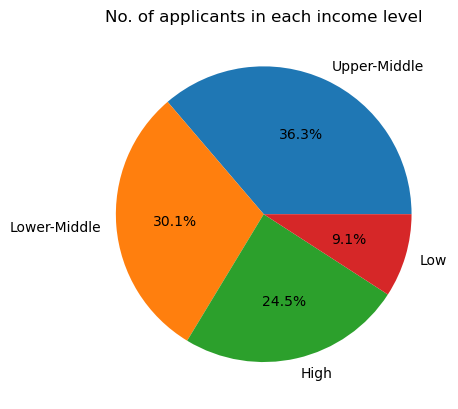

In [50]:
# Plotting a pie chart
plt.pie(income['no_of_applicants'], labels=income['income_level'], autopct='%1.1f%%')
plt.title('No. of applicants in each income level')
plt.show()

# Segment according to no. of dependents

In [51]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,cibil_rating,income_level,loan_rating,loan_term_type,dependent_level
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High,Gold,Intermediate,Moderate
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Upper-Middle,Silver,Intermediate,Low
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High,Gold,Long-Term,Moderate
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High,Platinum,Intermediate,Moderate
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High,Gold,Long-Term,High


In [52]:
dependents = df['dependent_level'].value_counts().reset_index()

In [53]:
dependents

,dependent_level,count
0,Moderate,1435
1,High,1425
2,Low,1409


In [54]:
dependents = dependents.rename(columns = {'count': 'no_of_applicants'})

In [55]:
dependents.head()

,dependent_level,no_of_applicants
0,Moderate,1435
1,High,1425
2,Low,1409


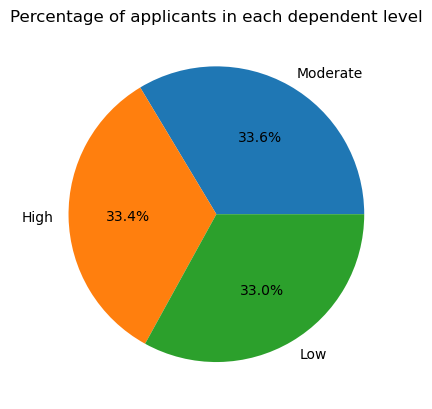

In [56]:
plt.pie(dependents['no_of_applicants'], labels = dependents['dependent_level'], autopct = '%1.1f%%')
plt.title('Percentage of applicants in each dependent level')
plt.show()

# Segment according to Education

In [57]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,cibil_rating,income_level,loan_rating,loan_term_type,dependent_level
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High,Gold,Intermediate,Moderate
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Upper-Middle,Silver,Intermediate,Low
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High,Gold,Long-Term,Moderate
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High,Platinum,Intermediate,Moderate
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High,Gold,Long-Term,High


In [58]:
education = df['education'].value_counts().reset_index()

In [59]:
education

,education,count
0,Graduate,2144
1,Not Graduate,2125


In [60]:
education = education.rename(columns = {'count' : 'no_of_applicants'})

In [61]:
education.head()

,education,no_of_applicants
0,Graduate,2144
1,Not Graduate,2125


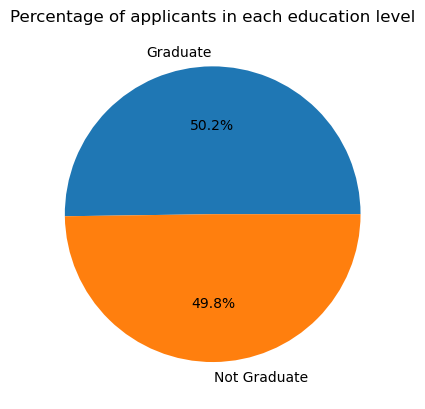

In [62]:
plt.pie(education['no_of_applicants'], labels = education['education'], autopct = '%1.1f%%')
plt.title('Percentage of applicants in each education level')
plt.show()

# Segment according to Employment

In [63]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,cibil_rating,income_level,loan_rating,loan_term_type,dependent_level
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High,Gold,Intermediate,Moderate
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Upper-Middle,Silver,Intermediate,Low
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High,Gold,Long-Term,Moderate
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High,Platinum,Intermediate,Moderate
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High,Gold,Long-Term,High


In [64]:
employment = df['self_employed'].value_counts().reset_index()
employment = employment.rename(columns = {'count' : 'no_of_applicants'})

In [65]:
employment.head()

,self_employed,no_of_applicants
0,Yes,2150
1,No,2119


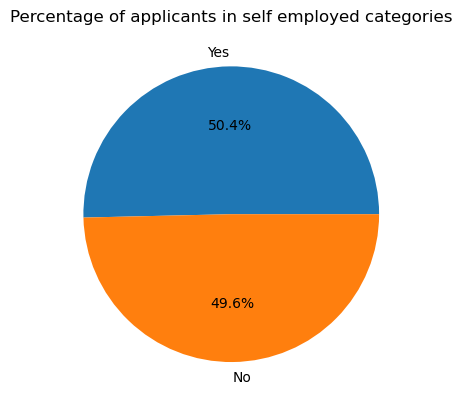

In [66]:
plt.pie(employment['no_of_applicants'], labels = employment['self_employed'], autopct = '%1.1f%%')
plt.title("Percentage of applicants in self employed categories")
plt.show()

# Rate of Loan Approvals

# Overall rate

In [67]:
# General loan approval rate
loans = df['loan_status'].value_counts().reset_index()

In [68]:
loans.head()

,loan_status,count
0,Approved,2656
1,Rejected,1613


In [69]:
loans = loans.rename(columns = {'count': 'no_of_applicants'})

In [70]:
loans.head()

,loan_status,no_of_applicants
0,Approved,2656
1,Rejected,1613


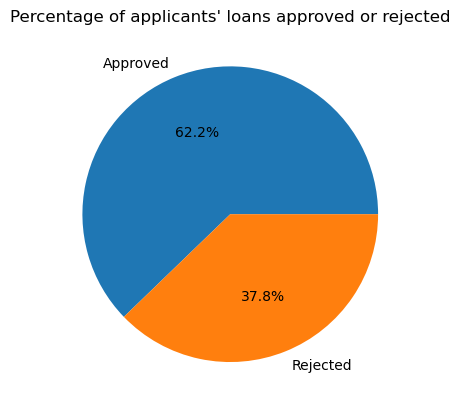

In [71]:
plt.pie(loans['no_of_applicants'], labels = loans['loan_status'], autopct = '%1.1f%%')
plt.title("Percentage of applicants' loans approved or rejected")
plt.show()

# Loan Approval by Education Levels

In [72]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,cibil_rating,income_level,loan_rating,loan_term_type,dependent_level
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High,Gold,Intermediate,Moderate
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Upper-Middle,Silver,Intermediate,Low
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High,Gold,Long-Term,Moderate
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High,Platinum,Intermediate,Moderate
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High,Gold,Long-Term,High


In [73]:
education = df.groupby(['education', 'loan_status']).size().reset_index()

In [74]:
education.head()

,education,loan_status,0
0,Graduate,Approved,1339
1,Graduate,Rejected,805
2,Not Graduate,Approved,1317
3,Not Graduate,Rejected,808


In [75]:
# create a pivot table
pivot_table = education.pivot(index = 'education', columns = 'loan_status', values = 0)

In [76]:
pivot_table

loan_status,Approved,Rejected
education,,
Graduate,1339,805
Not Graduate,1317,808


In [77]:
row_totals = pivot_table.sum(axis = 1)

In [78]:
row_totals

education
Graduate        2144
Not Graduate    2125
dtype: int64

In [79]:
percentage = pivot_table.div(row_totals, axis = 0) * 100

In [80]:
percentage

loan_status,Approved,Rejected
education,,
Graduate,62.453358,37.546642
Not Graduate,61.976471,38.023529


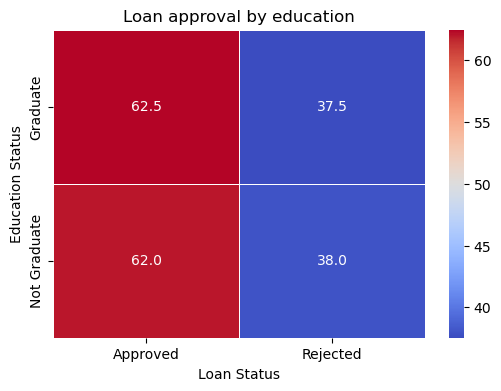

In [81]:
# Create a heatmap
plt.figure(figsize = (6, 4))
sns.heatmap(percentage, annot = True, fmt = '.1f', cmap = 'coolwarm', linewidth = 0.5)
# Labeling the heatmap
plt.title("Loan approval by education")
plt.xlabel("Loan Status")
plt.ylabel("Education Status")
plt.show()

# Loan approvals according to Type of employment

In [82]:
employment_type = df.groupby(['self_employed', 'loan_status']).size().reset_index()

In [83]:
employment_type

,self_employed,loan_status,0
0,No,Approved,1318
1,No,Rejected,801
2,Yes,Approved,1338
3,Yes,Rejected,812


In [84]:
# Filter to include approval and rejected
employment_type = employment_type[employment_type['loan_status'].isin(['Approved', 'Rejected'])]

In [85]:
employment_type.head()

,self_employed,loan_status,0
0,No,Approved,1318
1,No,Rejected,801
2,Yes,Approved,1338
3,Yes,Rejected,812


In [86]:
employment_type = employment_type.rename(columns = {0: 'Total'})

In [87]:
employment_type.head()

,self_employed,loan_status,Total
0,No,Approved,1318
1,No,Rejected,801
2,Yes,Approved,1338
3,Yes,Rejected,812


In [88]:
pivot_table = employment_type.pivot(index = 'self_employed', columns = 'loan_status', values = 'Total')

In [89]:
pivot_table

loan_status,Approved,Rejected
self_employed,,
No,1318,801
Yes,1338,812


In [90]:
 row_sum = pivot_table.sum(axis = 1)

In [91]:
row_sum

self_employed
No     2119
Yes    2150
dtype: int64

In [92]:
percentage = pivot_table.div(row_sum, axis = 0) * 100

In [93]:
percentage

loan_status,Approved,Rejected
self_employed,,
No,62.199151,37.800849
Yes,62.232558,37.767442


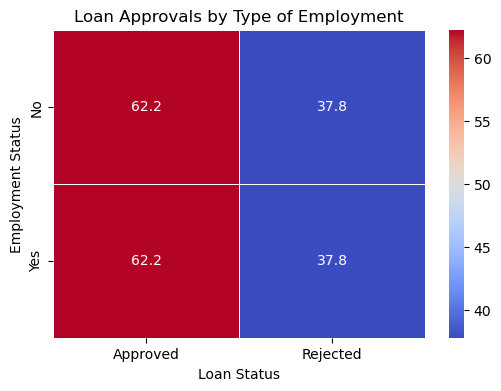

In [94]:
# Creating a heatmap
plt.figure(figsize = (6, 4))
sns.heatmap(percentage, annot = True, fmt = '.1f', cmap = 'coolwarm', linewidth = 0.5)
# Labelling the heatmap
plt.title("Loan Approvals by Type of Employment")
plt.xlabel("Loan Status")
plt.ylabel("Employment Status")
plt.show()

# Loan approvals according to Dependent Levels

In [95]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,cibil_rating,income_level,loan_rating,loan_term_type,dependent_level
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High,Gold,Intermediate,Moderate
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Upper-Middle,Silver,Intermediate,Low
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High,Gold,Long-Term,Moderate
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High,Platinum,Intermediate,Moderate
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High,Gold,Long-Term,High


In [96]:
dependent = df.groupby(['dependent_level', 'loan_status']).size().reset_index()
dependent = dependent.rename(columns = {0: 'no_of_applicants'})

In [97]:
dependent

,dependent_level,loan_status,no_of_applicants
0,High,Approved,871
1,High,Rejected,554
2,Low,Approved,887
3,Low,Rejected,522
4,Moderate,Approved,898
5,Moderate,Rejected,537


In [98]:
pivot_table = dependent.pivot(index = 'dependent_level', columns = 'loan_status', values = 'no_of_applicants')

In [99]:
pivot_table

loan_status,Approved,Rejected
dependent_level,,
High,871,554
Low,887,522
Moderate,898,537


In [100]:
df['dependent_level'].unique()

array(['Moderate', 'Low', 'High'], dtype=object)

In [101]:
row_sum = pivot_table.sum(axis = 1)

In [102]:
row_sum

dependent_level
High        1425
Low         1409
Moderate    1435
dtype: int64

In [103]:
percentage = pivot_table.div(row_sum, axis = 0) * 100

In [104]:
percentage

loan_status,Approved,Rejected
dependent_level,,
High,61.122807,38.877193
Low,62.952449,37.047551
Moderate,62.578397,37.421603


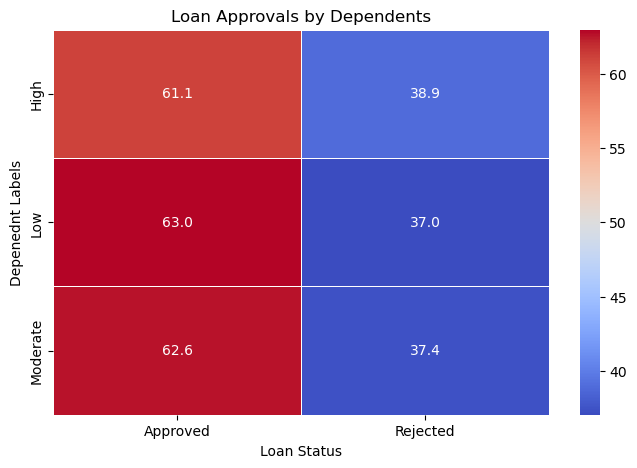

In [105]:
# Creating a heatmap
plt.figure(figsize = (8, 5))
sns.heatmap(percentage, annot = True, fmt = '.1f', cmap = 'coolwarm', linewidth = 0.5)
# Labelling the heatmap
plt.title("Loan Approvals by Dependents")
plt.xlabel("Loan Status")
plt.ylabel("Depenednt Labels")
plt.show()

# Loan Approval rate by CIBIL Rating

# The influence of CIBIL rating on loan approvals

In [106]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,cibil_rating,income_level,loan_rating,loan_term_type,dependent_level
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High,Gold,Intermediate,Moderate
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Upper-Middle,Silver,Intermediate,Low
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High,Gold,Long-Term,Moderate
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High,Platinum,Intermediate,Moderate
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High,Gold,Long-Term,High


In [107]:
df['cibil_rating'].unique()

array(['Excellent', 'Poor', 'Good', 'Average'], dtype=object)

In [108]:
# Group data according to CIBIL rating and loans status and count for each combination
cibil_rates = df.groupby(['cibil_rating', 'loan_status']).size().reset_index()
cibil_rates = cibil_rates.rename(columns = {0: 'Total'})

In [109]:
cibil_rates

,cibil_rating,loan_status,Total
0,Average,Approved,681
1,Average,Rejected,2
2,Excellent,Approved,1050
3,Excellent,Rejected,6
4,Good,Approved,740
5,Good,Rejected,5
6,Poor,Approved,185
7,Poor,Rejected,1600


In [110]:
# pivot table
pivot_table = cibil_rates.pivot_table(index = 'cibil_rating', columns = 'loan_status', values = 'Total')

In [111]:
pivot_table

loan_status,Approved,Rejected
cibil_rating,,
Average,681,2
Excellent,1050,6
Good,740,5
Poor,185,1600


In [112]:
# Calculating the approval rates
pivot_table['approval_rate'] = pivot_table['Approved'] / (pivot_table['Approved'] + pivot_table['Rejected']) * 100

In [113]:
pivot_table

loan_status,Approved,Rejected,approval_rate
cibil_rating,,,
Average,681,2,99.707174
Excellent,1050,6,99.431818
Good,740,5,99.328859
Poor,185,1600,10.364146


<Axes: xlabel='loan_status', ylabel='cibil_rating'>

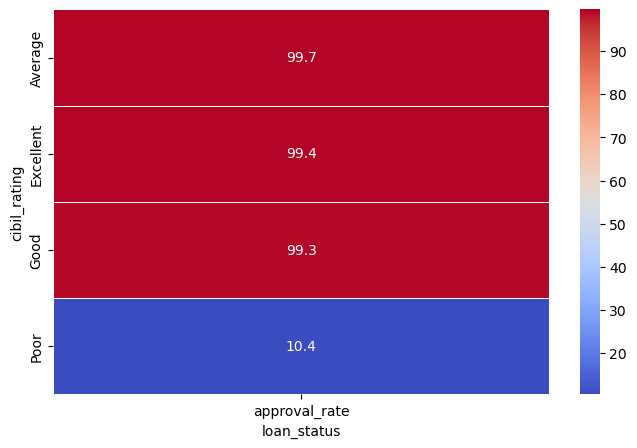

In [114]:
# Create a heatmap
plt.figure(figsize = (8, 5))
sns.heatmap(pivot_table[['approval_rate']], annot = True, fmt = '.1f', cmap = 'coolwarm', linewidth = 0.5)

# Correlation Analysis

In [115]:
correlation_matrix = df.corr(numeric_only = True)

In [116]:
correlation_matrix

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
loan_id,1.000000,0.005326,0.012592,0.008170,0.009809,0.016323,0.020953,0.018595,-0.000862,0.010765
no_of_dependents,0.005326,1.000000,0.007266,-0.003366,-0.020111,-0.009998,0.007390,-0.001531,0.002817,0.011163
income_annum,0.012592,0.007266,1.000000,0.927470,0.011488,-0.023034,0.636824,0.640328,0.929145,0.851093
loan_amount,0.008170,-0.003366,0.927470,1.000000,0.008437,-0.017035,0.594582,0.603188,0.860914,0.788122
loan_term,0.009809,-0.020111,0.011488,0.008437,1.000000,0.007810,0.008008,-0.005478,0.012490,0.017177
cibil_score,0.016323,-0.009998,-0.023034,-0.017035,0.007810,1.000000,-0.019907,-0.003769,-0.028618,-0.015478
residential_assets_value,0.020953,0.007390,0.636824,0.594582,0.008008,-0.019907,1.000000,0.414799,0.590919,0.527401
commercial_assets_value,0.018595,-0.001531,0.640328,0.603188,-0.005478,-0.003769,0.414799,1.000000,0.591128,0.548576
luxury_assets_value,-0.000862,0.002817,0.929145,0.860914,0.012490,-0.028618,0.590919,0.591128,1.000000,0.788517
bank_asset_value,0.010765,0.011163,0.851093,0.788122,0.017177,-0.015478,0.527401,0.548576,0.788517,1.000000


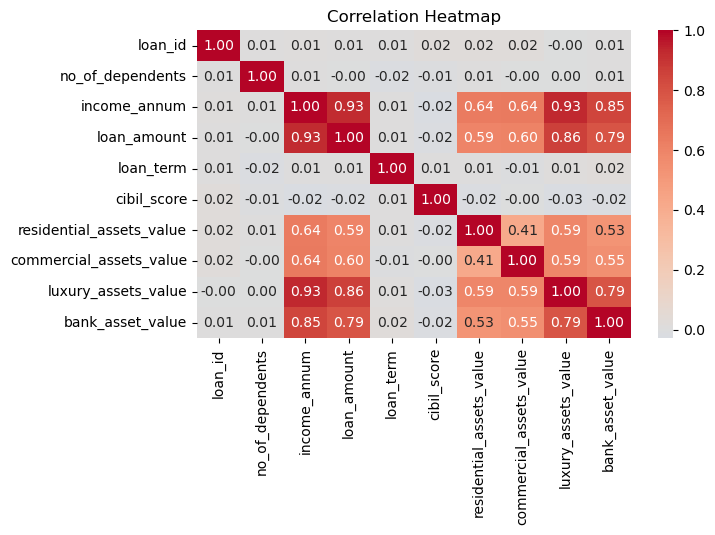

In [117]:
# Create the heatmap
plt.figure(figsize = (7, 4))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', center = 0, fmt = '.2f')
plt.title("Correlation Heatmap")
plt.show()

In [118]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status',
       'cibil_rating', 'income_level', 'loan_rating', 'loan_term_type',
       'dependent_level'],
      dtype='object')

In [119]:
# Correlation between asset value and income
assets = ['residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
income = 'income_annum'

In [120]:
# Calculate the correlation(Pearson correlation)
correlations = df[assets + [income]].corr()

In [121]:
correlations.head()

,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,income_annum
residential_assets_value,1.000000,0.414799,0.590919,0.527401,0.636824
commercial_assets_value,0.414799,1.000000,0.591128,0.548576,0.640328
luxury_assets_value,0.590919,0.591128,1.000000,0.788517,0.929145
bank_asset_value,0.527401,0.548576,0.788517,1.000000,0.851093
income_annum,0.636824,0.640328,0.929145,0.851093,1.000000


In [122]:
# Correlation between asset value and loan
assets = ['residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
loan = 'loan_amount'

In [123]:
# Calculate the correlation(Pearson correlation)
correlation = df[assets + [loan]].corr()

In [124]:
correlation

,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_amount
residential_assets_value,1.000000,0.414799,0.590919,0.527401,0.594582
commercial_assets_value,0.414799,1.000000,0.591128,0.548576,0.603188
luxury_assets_value,0.590919,0.591128,1.000000,0.788517,0.860914
bank_asset_value,0.527401,0.548576,0.788517,1.000000,0.788122
loan_amount,0.594582,0.603188,0.860914,0.788122,1.000000


# Asset value impact/ influence on loan approval/ eligibility

# If there is a relation between asset value and getting a loan approval

In [125]:
# Splitting data into two groups based on loan status
approved = df[df['loan_status'] == 'Approved']
rejected = df[df['loan_status'] == 'Rejected']

In [126]:
# perform a t-test
assets = ['residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
for columns in assets:
    t_stat, p_value = ttest_ind(approved[columns], rejected[columns], equal_var = False)
    print(f"T-Test for {columns}: ")
    print(f"    T-Statistic: {t_stat}")
    print(f"    P-Value: {p_value}")
    if p_value < 0.05: # 95% confidence level
        print(f"    The difference in {columns} between approved and rejected loans statistically significant")
    else:
        print(f"    The difference in {columns} between approved and rejected loans is not statistically significant")

T-Test for residential_assets_value: 
    T-Statistic: -0.9399394365500209
    P-Value: 0.34731539500224484
    The difference in residential_assets_value between approved and rejected loans is not statistically significant
T-Test for commercial_assets_value: 
    T-Statistic: 0.5387741456120381
    P-Value: 0.5900779272018964
    The difference in commercial_assets_value between approved and rejected loans is not statistically significant
T-Test for luxury_assets_value: 
    T-Statistic: -1.013970039592796
    P-Value: 0.3106683217824068
    The difference in luxury_assets_value between approved and rejected loans is not statistically significant
T-Test for bank_asset_value: 
    T-Statistic: -0.4448616890142232
    P-Value: 0.6564475917396153
    The difference in bank_asset_value between approved and rejected loans is not statistically significant


# Using ANOVA to determine a correlation between income and asset value

In [127]:
# null hypothesis: There is no relation (significant difference) between assets value and income
# alternate hypothesis: There exists a relationship (significant difference) between asset value and income

In [128]:
# Extracting values in columns
residential_assets = df['residential_assets_value']
commercial_assets = df['commercial_assets_value']
luxury_assets = df['luxury_assets_value']
bank_assets = df['bank_asset_value']
income = df['income_annum']

In [129]:
# perform ANOVA
f_statistic, p_value = f_oneway(residential_assets, commercial_assets, luxury_assets, bank_assets, income)
print('The f statistics: ', f_statistic)
print('The p value is: ', p_value)
# Interpretation of the results
if p_value < 0.05:
    print('There is a significant influence of income on asset value')
else:
    print('There is no significant influence of income on asset value')

The f statistics:  2518.654468935116
The p value is:  0.0
There is a significant influence of income on asset value


# Correlation between income and loan amount

In [130]:
income = df['income_annum']
loan = df['loan_amount']

In [133]:
# perform an independent t-test
t_stat, p_value = ttest_ind(income, loan, equal_var = True)
print('The T statistics is: ', t_stat)
print('The p value is: ', p_value)
if p_value < 0.05:
    print('There is a satistical significant difference in loan amount and income per annum')
else:
    print('There is no statistical significant difference in loan amount and income per annum')

The T statistics is:  -69.51489699866843
The p value is:  0.0
There is a satistical significant difference in loan amount and income per annum


# Box plot to represent Correlation between income and loan amount 

In [134]:
income = df['income_annum']
loan = df['loan_amount']

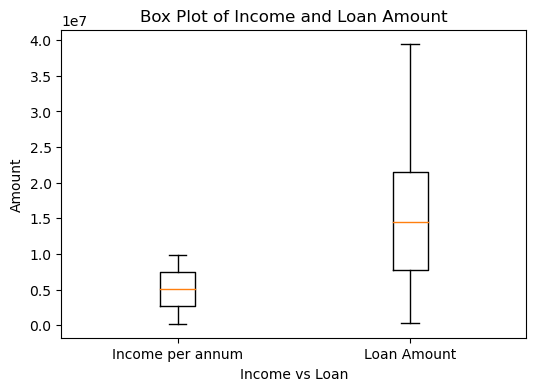

In [136]:
# create the figure
plt.figure(figsize = (6, 4))
ax = plt.axes()
# plotting the box plots
ax.boxplot([income, loan], labels = ['Income per annum', 'Loan Amount'])
# Chart labels
plt.xlabel('Income vs Loan')
plt.ylabel('Amount')
plt.title('Box Plot of Income and Loan Amount')
plt.show()

# Chi- Square analysis: Determine correlation between loan status and no. of dependents

In [137]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status',
       'cibil_rating', 'income_level', 'loan_rating', 'loan_term_type',
       'dependent_level'],
      dtype='object')

In [138]:
# Creating a contingency table
contingency_table = pd.crosstab(df['loan_status'], df['dependent_level'])

In [139]:
contingency_table

dependent_level,High,Low,Moderate
loan_status,,,
Approved,871,887,898
Rejected,554,522,537


In [141]:
# Perform chi-square
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print('Chi- square test statistic: ', chi2)
print('The P- value is: ', p_value)
print('The dof is: ', dof)
# Set the significance level
alpha = 0.05
if p_value < alpha:
    print('There is a statistically significant relationship between loan status and the no. of dependents')
else:
    print('There is no statistically significant relationship between loan status and the no. of dependents')

Chi- square test statistic:  1.1296798036848839
The P- value is:  0.5684511474541935
The dof is:  2
There is no statistically significant relationship between loan status and the no. of dependents


# Logistic Regression

In [142]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,cibil_rating,income_level,loan_rating,loan_term_type,dependent_level
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High,Gold,Intermediate,Moderate
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Upper-Middle,Silver,Intermediate,Low
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High,Gold,Long-Term,Moderate
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High,Platinum,Intermediate,Moderate
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High,Gold,Long-Term,High


In [143]:
def edu_status(status):
    if status == 'Graduate':
        return 1
    elif status == 'Not Graduate':
        return 0
    else:
        return 'unknown'

In [144]:
df['edu_status'] = df['education'].apply(edu_status)

In [145]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,cibil_rating,income_level,loan_rating,loan_term_type,dependent_level,edu_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High,Gold,Intermediate,Moderate,1
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Upper-Middle,Silver,Intermediate,Low,0
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High,Gold,Long-Term,Moderate,1
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High,Platinum,Intermediate,Moderate,1
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High,Gold,Long-Term,High,0


In [146]:
def type_employment(employment):
    if employment == 'Yes':
        return 1
    elif employment == 'No':
        return 0

In [147]:
df['employment_type'] = df['self_employed'].apply(type_employment)

In [148]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,cibil_rating,income_level,loan_rating,loan_term_type,dependent_level,edu_status,employment_type
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High,Gold,Intermediate,Moderate,1,0
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Upper-Middle,Silver,Intermediate,Low,0,1
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High,Gold,Long-Term,Moderate,1,0
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High,Platinum,Intermediate,Moderate,1,0
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High,Gold,Long-Term,High,0,1


In [149]:
def loan_approval(status):
    if status == 'Approved':
        return 1
    elif status == 'Rejected':
        return 0

In [151]:
df['loan_approval'] = df['loan_status'].apply(loan_approval)

In [152]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,...,bank_asset_value,loan_status,cibil_rating,income_level,loan_rating,loan_term_type,dependent_level,edu_status,employment_type,loan_approval
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,...,8000000,Approved,Excellent,High,Gold,Intermediate,Moderate,1,0,1
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,...,3300000,Rejected,Poor,Upper-Middle,Silver,Intermediate,Low,0,1,0
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,...,12800000,Rejected,Poor,High,Gold,Long-Term,Moderate,1,0,0
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,...,7900000,Rejected,Poor,High,Platinum,Intermediate,Moderate,1,0,0
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,...,5000000,Rejected,Poor,High,Gold,Long-Term,High,0,1,0


In [153]:
# Separating x-axis values
X = df.drop(columns = {'loan_id', 'education', 'self_employed', 'loan_status', 'cibil_rating', 'income_level', 'loan_rating', 'loan_term_type', 'dependent_level', 'loan_approval'})

In [154]:
X

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,edu_status,employment_type
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,0
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,1
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1,0
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1,0
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1000000,2300000,12,317,2800000,500000,3300000,800000,1,1
4265,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000,0,1
4266,2,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0,0
4267,1,4100000,12800000,8,780,8200000,700000,14100000,5800000,0,0


In [155]:
# Defining the y-axis
y = df['loan_approval']
y

0       1
1       0
2       0
3       0
4       0
       ..
4264    0
4265    1
4266    0
4267    1
4268    1
Name: loan_approval, Length: 4269, dtype: int64

In [156]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: loan_approval, dtype: int64

# Importing the regression model modules

In [158]:
# Importing logistic regression modules
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [159]:
# Split data to test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 21)

In [161]:
X_train.shape

(2988, 11)

In [162]:
X_test.shape

(1281, 11)

In [164]:
# Scaling our data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [165]:
X_train_scaled

array([[-1.46148376,  1.48642509,  1.54664878, ...,  0.32060948,
        -1.00268097,  0.99266412],
       [ 1.47642896,  0.02091063,  0.58652234, ..., -0.44959563,
         0.9973262 , -1.00739009],
       [-0.87390121, -1.15864979, -1.20129933, ..., -1.18899253,
        -1.00268097,  0.99266412],
       ...,
       [-0.87390121,  1.16472679,  1.01692385, ...,  0.96758177,
        -1.00268097, -1.00739009],
       [ 0.30126387,  0.12814339,  0.56445046, ...,  0.96758177,
        -1.00268097, -1.00739009],
       [-0.87390121,  1.5579136 ,  0.50927078, ...,  0.35141768,
        -1.00268097, -1.00739009]])

In [166]:
X_test_scaled

array([[ 0.87727868, -1.47884669, -1.36514955, ..., -1.34858088,
         0.99144951, -1.00705062],
       [-0.90746561,  0.75700195,  0.64145581, ...,  0.22028086,
        -1.00862423,  0.99299875],
       [ 0.28236392,  1.14738822,  1.04277689, ...,  1.26618868,
         0.99144951, -1.00705062],
       ...,
       [ 0.28236392,  1.71522279,  1.81197561, ...,  1.7276186 ,
        -1.00862423,  0.99299875],
       [ 1.47219344,  1.75071245,  2.60346995, ...,  0.43561482,
        -1.00862423,  0.99299875],
       [-0.31255085,  0.08269839,  0.25128255, ..., -0.11810109,
        -1.00862423,  0.99299875]])

In [167]:
# Training the model
log_reg = LogisticRegression(random_state = 0).fit(X_train_scaled, y_train)

In [168]:
# Predict
log_reg.predict(X_train_scaled)

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [169]:
# Accuracy
log_reg.score(X_train_scaled, y_train)

0.9200133868808568

In [170]:
# Application of model to new dataset
log_reg.score(X_test_scaled, y_test)

0.912568306010929